In [81]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.text_cell_render.rendered_html{font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

<b><font size="6" color ="red" > N찬원 배열(Numpy 배열) 다루기</font></b>
- [numpy](http://www.numpy.org)
- [numpy docs](https://numpy.org/doc/stable)
- 2차원 배열은 행렬개념으로 이해
- numpy 패키지를 이용(C언어로 구현된 고성능 추치계산 패키지)
# 1절 sjavkdl volwl

In [3]:
import numpy as np
np.__version__






'1.23.5'

In [4]:

# np.arrage(from,stop,by) : from부터 stop앞까지 by씩 증가하는 1차우너 배열 생성
a = np.arange(15) # 0qnxj 15dkvRkwl 1Tlr wmdrkgksms 1ckdnjs qoduf
a


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

## 1.1 배열 속성
-

In [5]:
from numpy import arange
a = arange(15,#dtype=np.int32).reshape(3,5) #E행5열짜리 2차원 배열로 변환
a

SyntaxError: incomplete input (3796616580.py, line 3)

In [6]:
type(a) # a 변수의 타입

numpy.ndarray

In [7]:
a.dtype # a배열 요소들의 type

dtype('int32')

In [8]:
a.dtype.name

'int32'

In [9]:
a.itemsize # 배열안의 한 요소의 bytesize

4

In [10]:
a.ndim # 축수(차원수)

1

In [11]:
a.size # 배열 요소의 갯수

15

In [12]:
a.shape # 배열의 구조(3행 5열)

(15,)

In [13]:
print('shape 조정 전 a\n', a)
a.shape = (5, 3)
print('shape 조정 후 a\n',a)

shape 조정 전 a
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
shape 조정 후 a
 [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]


In [14]:
a

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

## 1.2 배열 타입 변경

In [27]:
a = arange(12).reshape(3,4)
a

NameError: name 'arange' is not defined

In [16]:
a.size # 요소개수

15

In [17]:
a.dtype

dtype('int32')

In [18]:
a.itemsize

4

In [28]:
a.dtype = np.int64 # 읽을 때 int64로(64bit씩) 읽는다

ValueError: When changing to a larger dtype, its size must be a divisor of the total size in bytes of the last axis of the array.

In [20]:
a.dtype

dtype('int32')

In [21]:
a

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [22]:
a.itemsize

4

In [23]:
a.size

15

In [24]:
# 배열 요소의 타입을 수정
a = arange(12).reshape(3,4)
a

NameError: name 'arange' is not defined

In [25]:
a.astype('int64')
#a.astype(np.int64)

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]], dtype=int64)

In [26]:
a.itemsize

4

In [23]:
a.size

15

In [24]:
a

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [25]:
a.ravel() # flatten된 배열 return


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [26]:
a.flatten() # 함수의 결과가 return되면 배열 수정안함

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

## 1.3 배열 저장
- pkl(객체저장, 배열, 머신러닝 모델) vs npy(넘파이 전용 포맷, io속도 개선)

In [27]:
a

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [28]:
%%time
import pickle
with open('data/ch10.pkl', 'wb') as f:
    pickle.dump(a,f)

CPU times: total: 0 ns
Wall time: 953 µs


In [29]:
with open('data/ch10.pkl','rb') as f:
    loaded_a = pickle.load(f)

In [30]:
loaded_a

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [31]:
%%time
np.save('data/ch10.npy',a)

CPU times: total: 0 ns
Wall time: 501 µs


In [32]:
%%time
loaded_a2 = np.load('data/ch10.npy')

CPU times: total: 0 ns
Wall time: 2 ms


# 2절 넘파이 배열
- array()함수를 이용하여 다른 파이썬 구조(list,tuple)를 배열로 변환
- 기탐함수들 : arrmge, one, zeros, full, empty ... linspace
- 랜덤값을 갖는 함수들 : np.random  



## 2.1 array()함수로 너파이 배d열 만드리기
- array(obj,dtyp = np.ㅌㅌsk "xx", copy=R--T/F)


In [33]:
a = np.array([2,4,6],dtype = np.int16)
a

array([2, 4, 6], dtype=int16)

In [34]:
a[0] , a[1], a[2]


(2, 4, 6)

In [35]:
b = np.array([[1.5,2.3], # 배열은 동일 자료형의 집합 : 정수 -> 실수 .-> 정수 > 실수> 뮨자
             [4,5]])

b

array([[1.5, 2.3],
       [4. , 5. ]])

In [36]:
b[0][1], b[0,1]

(2.3, 2.3)

In [37]:
l = [[1.5,2.3] ,[4,5]]
l[0][1]

2.3

In [38]:
print(b.dtype) # 정수 기본타입은 int32, 실수 기본타입은 float64
print(b.itemsize)

float64
8


In [39]:
a.astype(np.float32) # 함수의 결과를 returnn하면 a는 rmeofh

array([2., 4., 6.], dtype=float32)

In [40]:
for row in b:
    for item in row:
        print(item, end='\t')
    print() # 개행

1.5	2.3	
4.0	5.0	


In [41]:
for i, row in enumerate(b):
    for j, item in enumerate(row):
        print('{}행{}열 : {}({})'.format(i,j,item,b[i,j]), end='\t')
    print() # 개행

0행0열 : 1.5(1.5)	0행1열 : 2.3(2.3)	
1행0열 : 4.0(4.0)	1행1열 : 5.0(5.0)	


In [42]:
# 행렬의 인덱싱, 슬라이싱
b = np.array([[1,2,3,4,5],[6,7,8,9,10],[11,12,13,14,15]], dtype = np.int16)
b

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15]], dtype=int16)

In [43]:
b[0,1]

2

In [44]:
b[3,0]

IndexError: index 3 is out of bounds for axis 0 with size 3

In [45]:
b[0,2]

3

In [46]:
print('0~1행, 1~2열 :', b[0][1:3],b[1][1:3])
print('2행모두 :',b[2])
print('4열(마지막열)모두 :' ,b[0][4],b[1][4],b[2][4])
print( b[2][0:4])
    

0~1행, 1~2열 : [2 3] [7 8]
2행모두 : [11 12 13 14 15]
4열(마지막열)모두 : 5 10 15
[11 12 13 14]


In [47]:
print('0~1행, 1~2열 :',b[0:2, 1:3])
print('2행모두 :',b[2,:],b[2]) #특정행, 모든 열을 추출할 경우, 열생략 가능
print('4열(마지막열)모두 :' ,b[:,4], b[...,4], b[:,-1])
print('4열(마지막열)모두 :' ,b[:,4:], b[...,4:], b[:,-1:])
print(b[:,:-1])

0~1행, 1~2열 : [[2 3]
 [7 8]]
2행모두 : [11 12 13 14 15] [11 12 13 14 15]
4열(마지막열)모두 : [ 5 10 15] [ 5 10 15] [ 5 10 15]
4열(마지막열)모두 : [[ 5]
 [10]
 [15]] [[ 5]
 [10]
 [15]] [[ 5]
 [10]
 [15]]
[[ 1  2  3  4]
 [ 6  7  8  9]
 [11 12 13 14]]


In [48]:
print('4열(마지막열)모두 :' ,b[2:,4], b[...,4], b[:,-1])

4열(마지막열)모두 : [15] [ 5 10 15] [ 5 10 15]


In [49]:
# 스칼라변수

a = [0,1]

copy_a = a.copy() #복제본
print(f"a={a},복제본{copy_a}")
copy_a[0] = -1
print(f"a={a},복제본{copy_a}")





a=[0, 1],복제본[0, 1]
a=[0, 1],복제본[-1, 1]


In [50]:
# numpy 배열
import numpy as np
c = np.array([[1,2],[3,4] ])
#d = c
d = np.array(c,copy=True) # 깊은 복사 : d = c.copy()동일
print('c = ',c, sep='\n')
print('d = ',d,sep='\n')
d[0,0] = 9      
print('c=',c,sep='\n')
print('d=',d,sep='\n')

c = 
[[1 2]
 [3 4]]
d = 
[[1 2]
 [3 4]]
c=
[[1 2]
 [3 4]]
d=
[[9 2]
 [3 4]]


## 2.2 기본값이 있는 배열 만들기
- np.zeros(tup): 요소들이 다 0
- np.ones(tup) : 요소들이 다 1
- np.full(tup,기본값) : 요소들이 다 두번쨰 매개변수
- np.empty(tup) : 초기 내용은 임의값인 배열(메모리 상태에 따라 초기값 달라짐)

※ 위의 함수를 이용해서 생성된 배열은 기본 dtype이 float64 . dtype속성을 따로 지정 가능

In [51]:
x = np.zeros((3,)) # 3열짜리 1차원 float64 배열(요소들은 다 0)
x = np.zeros(3)

x

array([0., 0., 0.])

In [52]:
x = np.zeros ( (2,5), dtype = np.bool8)
print(x)
print(x.dtype)
print(x.itemsize)

[[False False False False False]
 [False False False False False]]
bool
1


In [53]:
np.ones((2,5), dtype = np.int8)

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=int8)

In [54]:
np.full((6,6),125)

array([[125, 125, 125, 125, 125, 125],
       [125, 125, 125, 125, 125, 125],
       [125, 125, 125, 125, 125, 125],
       [125, 125, 125, 125, 125, 125],
       [125, 125, 125, 125, 125, 125],
       [125, 125, 125, 125, 125, 125]])

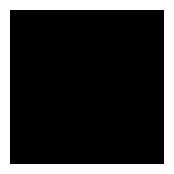

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize = (2,2)) # 시각화한 그래프 크기 figsize = (가로, 세로)

img  = np.full((28,28),0, dtype = np.uint8)
plt.imshow(img, cmap = 'gray', vmin = 0, vmax= 255)

plt.axis('off') # 축 ㅇ벗애기
plt.show()

In [56]:
np.empty((3,2)) # 초기값이 메모리 상ㅌ태에 따라 다름

array([[  0.,   0.],
       [  0., 200.],
       [200.,   0.]])

## 2.4 랜덤값을 갖는 배열 만들기
- np.random.random(tup) : 0부터 1미만의 균등분포를 갖는 랜덤값 배열
- np.random.uniform(low = 0.0, high = 1, size = tup) : low부터 high미민의 균등분포를 갖는 랜덤값
- np.random.normal(loc = 0.0, scale1.0, size = tup) : 평균loc과 표준편차 scale을 갖는 정규분포 랜덤값 

- np.random.rand(n) : 균등분포의 1차원 난수 배열발생 (난수 n개)
- np.random.randn(n) : 표준정규분포 (평균0, 표준편차1)

cf) np.random.randint(from,to) : from부터 to미만의 정수 난수 1개발생 == random.randint(from,to-1)

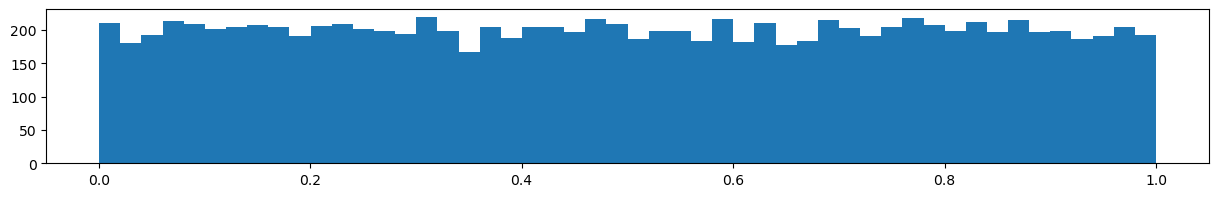

In [57]:
import matplotlib.pyplot as plt
x = np.random.rand(10000)
plt.figure(figsize=(15,2)) # 그래프 크기
plt.hist(x, bins = 50)
plt.show()

In [58]:
np.random.randint(1,3) # 1,2

1

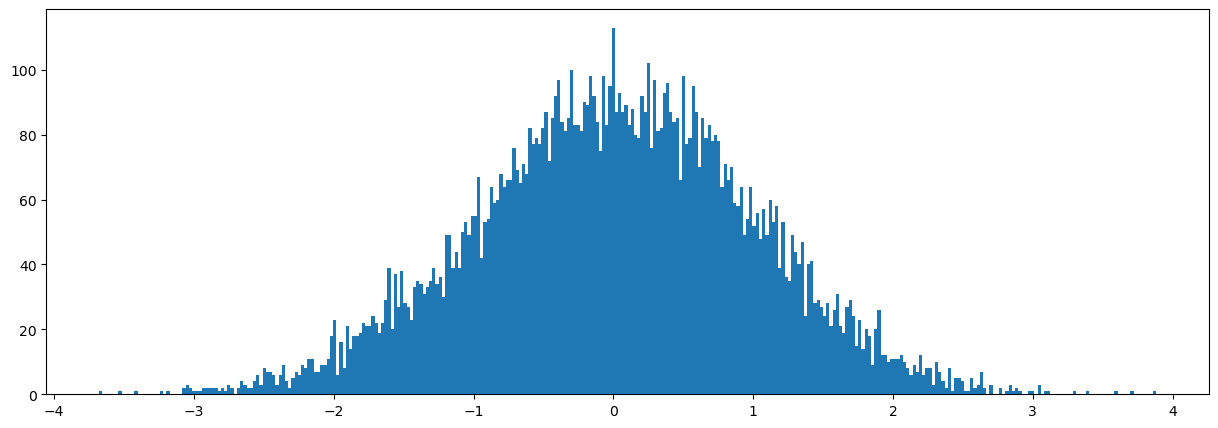

In [61]:
import matplotlib.pyplot as plt

x = np.random.randn(10000) # 정규분포(표준정규분포는 평균 0, 표준편차가 1인 정규분포)
plt.figure(figsize=(15,5)) # 그래프 크기
plt.hist(x, bins = 330)
plt.show()

In [62]:
# 1차원 난수 배열
print(np.random.rand(3)) # 균등분포
print(np.random.randd(3)) # 정규분포

array([0.25783032, 0.53549678, 0.30105087])

In [64]:
# 2차원 난수 배열
np.random.random((2,5)) # 2행5열짜리 균등분포(0~1미만) 난수 배열

array([[0.9752758 , 0.43350345, 0.13379457, 0.60331207, 0.36091898],
       [0.32945503, 0.88820645, 0.92506556, 0.94010345, 0.83363288]])

In [69]:
np.random.uniform(low =-2, high = 2, size=(2,)) #2행 5열짜리 균등분포(-2~2 미만 난수 배열)

array([1.06795427, 1.47818724])

In [70]:
np.random.normal(-1, 1,size = (2,5)) #2행5열짜리 정규분포(평균0, 표준편차1) 난수 배열

array([[-0.19076253, -1.42056198, -0.59998848, -0.81816147, -1.54672151],
       [-0.93663156, -2.09738173, -1.67681787, -0.72596499,  0.24922486]])

## 2.4 연속된 값을 갖는 배열 만들기
- np.arange(from,to,by,dtype) ; from부터 to앞까지 by씩 건너뛴 값을 1차원 배열로 생성
- np.linspace(from,to,num) :from부터 to(to포함)까지 num개 숫자들을 1차원 배열로 생성


In [112]:
np.arange(10,30,5, dtype = np.float64)

array([10., 15., 20., 25.])

In [113]:
np.arange(0, 2.1, 0.3)

array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1])

In [114]:
np.linspace(0,5,5)

array([0.  , 1.25, 2.5 , 3.75, 5.  ])

In [115]:
# Linespace : 틀정한 번위의 수들을 많이 생성할 때
from numpy import pi, linspace
x = linspace(0, 2*pi, 100)
y = np.sin(x)

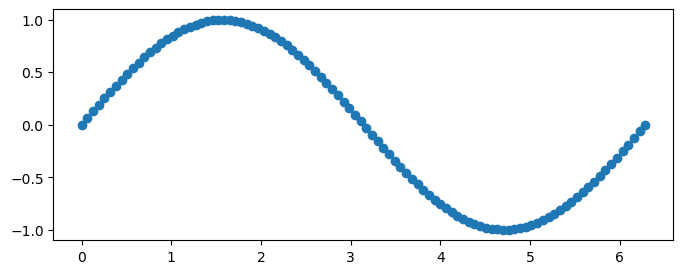

In [116]:
plt.figure(figsize=(8, 3))
plt.scatter(x,y)
plt.show()

## 2.5 배열의 차원 변경
- reshape(행수, 열수) : -1 가능
- resize(행수, 열수) : -1 불가
- T : 전치행렬로 변환
- transpose() : 전치행렬로 변환
※ 실행결과가 출력되면 배열이 수정되지 않고, 실행결과가 없으면 배열이 수정됨 

In [117]:
t = np.random.random((2,3))
t

array([[0.80878578, 0.77027303, 0.50709999],
       [0.58499575, 0.86515208, 0.05454627]])

In [118]:
t * 10

array([[8.08785776, 7.70273031, 5.07099994],
       [5.84995749, 8.65152078, 0.54546272]])

In [119]:
np.round(t*10) # 반올림
a

<ufunc 'floor'>

In [120]:
a = a.astype(np.int16)
a

AttributeError: 'numpy.ufunc' object has no attribute 'astype'

In [121]:
a.reshape(-1, 1) # -1이 주어지면 해당차원의 크기가 자동 계산


AttributeError: 'numpy.ufunc' object has no attribute 'reshape'

In [122]:
a.resahpe(3,-1)

AttributeError: 'numpy.ufunc' object has no attribute 'resahpe'

In [124]:
a.resize(2,3) # 실행결과가 출력 안 되면 a가 바뀜
a

AttributeError: 'numpy.ufunc' object has no attribute 'resize'

In [125]:
a.reshape((3,2))

AttributeError: 'numpy.ufunc' object has no attribute 'reshape'

In [128]:
a

<ufunc 'floor'>

In [129]:
# 전치행렬 (x행y열 -> y핼x열)
a.T # a의 전치행렬

AttributeError: 'numpy.ufunc' object has no attribute 'T'

## 2.6 배열 출력


In [130]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [131]:
np.arange(2000)

array([   0,    1,    2, ..., 1997, 1998, 1999])

In [133]:
# 배열 요소가 몇개까지 다 출려되나. 1000개 요소 이상은 생략되서 출력
np.get_printoptions()['threshold']


1000

In [135]:
import sys

np.set_printoptions(threshold=sys.mmaxsize) # 정수최대치까지 출력가능
np.set_printoptions(threshold=np.inf) # 무한대까지 출력가능

In [136]:
# 배열이 커서 인쇄가 안되는 경우  : 모서리부분만 출력
np.arange(10000).reshape(100,100)

array([[   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
          11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
          22,   23,   24,   25,   26,   27,   28,   29,   30,   31,   32,
          33,   34,   35,   36,   37,   38,   39,   40,   41,   42,   43,
          44,   45,   46,   47,   48,   49,   50,   51,   52,   53,   54,
          55,   56,   57,   58,   59,   60,   61,   62,   63,   64,   65,
          66,   67,   68,   69,   70,   71,   72,   73,   74,   75,   76,
          77,   78,   79,   80,   81,   82,   83,   84,   85,   86,   87,
          88,   89,   90,   91,   92,   93,   94,   95,   96,   97,   98,
          99],
       [ 100,  101,  102,  103,  104,  105,  106,  107,  108,  109,  110,
         111,  112,  113,  114,  115,  116,  117,  118,  119,  120,  121,
         122,  123,  124,  125,  126,  127,  128,  129,  130,  131,  132,
         133,  134,  135,  136,  137,  138,  139,  140,  141,  142,  143,
         144,  145,  14

## 2.7 기본 연산 동작
## 1) 배열의 요소별 연산

In [30]:
import numpy as np
# 리스트
a = [10,20,30,40]
b = list(range(4))
a + b, a*3

([10, 20, 30, 40, 0, 1, 2, 3],
 [10, 20, 30, 40, 10, 20, 30, 40, 10, 20, 30, 40])

In [32]:
# numpy array
a = np.array([10,20,30,40])
b = np.arange(4)
a,b

(array([10, 20, 30, 40]), array([0, 1, 2, 3]))

In [33]:
a + b # 요소별 연산

array([10, 21, 32, 43])

In [34]:
a * 3 # 요소별 #3 연산

array([ 30,  60,  90, 120])

In [35]:
a * b #요소별 # 연산

array([  0,  20,  60, 120])

In [36]:
a ** b # 요소별 제곱연산

array([    1,    20,   900, 64000])

In [37]:
a

array([10, 20, 30, 40])

In [38]:
a < 40 # 요소별 연산

array([ True,  True,  True, False])

In [39]:
a[0]

10

In [44]:
print(a[[0,3]]) # 0, 3 번째 인덱스 ITEM

print(a[[True, False, False, True]])  #0은 True 1은 False, 2은 False, 3은 True

[10 40]
[10 40]


In [45]:
# a배열에서 40보다 작은 데이터만 추출
a[a<40]

array([10, 20, 30])

In [46]:
# a배열에서 40보다 작은 데이터의 index

np.where(a<40)

(array([0, 1, 2], dtype=int64),)

### 2) 행렬의 곱(@, dot함수)
cf. *(요소별 곱)

In [51]:
# 단위행렬에서는 교환법칙 성립

A = np.array( [[1,1],
            [0,11]])
B = np.array([[ 2,0],
             [3,4]])
A@B, B@A # B: 2행 2열짜리 단위행렬

(array([[ 5,  4],
        [33, 44]]),
 array([[ 2,  2],
        [ 3, 47]]))

In [49]:
print('요소별 곱 A*B =', A*B, sep = '\n')
print('행렬곱 A@B =', A@B, sep = '\n')


print('행렬곱 A,dot(B) =', A@B, sep = '\n')

요소별 곱 A*B =
[[2 0]
 [0 4]]
행렬곱 A@B =
[[5 4]
 [3 4]]
행렬곱 A,dot(B) =
[[5 4]
 [3 4]]


In [ ]:
# 일반적으로는 행렬곱은 교환법칙이 성립 안 함
print('A@B =', A@B, sep='\n')

In [53]:
np.eye(2) # 2행 2열짜리 단위행렬

array([[1., 0.],
       [0., 1.]])

In [54]:
np.eye(3) # 2행 2열짜리 단위행렬

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

### 3) 복합 대입 연산자 사용(+=, -=, *= , ..._
- 배열에서의 a += b -는 a = a + b와 닷 ㅗ다르게 작동한다

In [75]:
a = np.ones((2,3), dtype = np.int8) # 2행3열짜리 int8배열


b = np.random.random((2,3)) # 2행3열짜리 random값(0부터 1미만의 균등분포를 갖는) float 배열

print(a,b,sep = '\n')

[[1 1 1]
 [1 1 1]]
[[0.52850031 0.64736059 0.49225982]
 [0.34707861 0.04017515 0.00151726]]


In [76]:
a += 256 # a + 256 겨로가를 a에 넣는데, 공간이 부족하면 앞이 짤림
a

array([[1, 1, 1],
       [1, 1, 1]], dtype=int8)

In [77]:
a = a + 256 
a

array([[257, 257, 257],
       [257, 257, 257]], dtype=int16)

In [78]:
# a는 int16, b는 float64
b.dtype

dtype('float64')

In [80]:
b += a # b+a의 결과를 b에 넣는다
b 

array([[514.52850031, 514.64736059, 514.49225982],
       [514.34707861, 514.04017515, 514.00151726]])

In [82]:
b += a # a+b의 결과를 a에 넣는다
a

array([[257, 257, 257],
       [257, 257, 257]], dtype=int16)

### 4) 배열 요소별 집계
- sum, min, max, mean, var(분산), std(표준편차)

In [84]:
a = np.array([[2,2,2,3],
            [4,3,2,1]])
a

array([[2, 2, 2, 3],
       [4, 3, 2, 1]])

In [85]:
print('전체 합 :', a.sum(), np.sum(a))
print('전체 평균 :', a.mean(), np.mean(a))
print('전체 최소값 :', a.min(), np.min(a))
print('전체 최대값 :', a.max(), np.max(a))
print('전체 분산 :', a.var(), np.var(a))
print('전체 표준편차 :', a.std(), np.std(a))

전체 합 : 19 19


In [86]:
# 분산에 루트를 씌우면 표준편차

import math
math.sqrt(a.var()) #math.sqrt(스칼라데이터

0.8569568250501305

### 5) 배열 축별 집계

- 축별 sum, min, max, mean, var(분산), std(표준편차), argmax(최대값 inex)



In [87]:
a

array([[2, 2, 2, 3],
       [4, 3, 2, 1]])

In [93]:
# 행별 합계 : axis = 0(행), axis = 1 -)열
print('a 행별 합 : ',a.mean(axis = 1), np.mean(amsxis=a))
print('a 행별 평균 ', a.mean(axis = 1), np.mean(amsxis=a))

TypeError: _mean_dispatcher() got an unexpected keyword argument 'amsxis'

In [ ]:
#열별 합계 : 열을 고정하고 행(,axis0축) 들ㅇ릐 합
print('a 열별 합 :', a.sum(axis = 0), np.sum(a, axis = 0) )

## 2.8 그 외 요소별 계산하는 범용함수들
- 메머리를 효율적으로 사용할 수 있음

- np.add(A,B,c) C = np.add(A,B) : C = A + B
- np.multiply(A,B,C) : C - np.multiply(A,B): C = A*B
- np.substract(A,B,C)...
- np.sqrt(배열) : 제곱근 cf math.sqrt(스칼라변수)



In [95]:
a = np.array([1,2])
b = np.array([3,4]) 
c = np.empty((2,))

a,b,c

(array([1, 2]), array([3, 4]), array([2.25, 2.5 ]))

In [97]:
%%time
np.add(a,b,c)
c

CPU times: total: 0 ns
Wall time: 0 ns


array([4., 6.])

In [98]:
%%time
c = a + b
c

CPU times: total: 0 ns
Wall time: 0 ns


array([4, 6])

In [ ]:
# 메모리 사용량과 속도 측정을 해주는 메머리 프로파일러를 로드
# 아나콘다 프롬프트에서 pip install 라이브어리 이름(memory_profiler)

In [101]:
%load_ext memory_profiler
A = np.random.randn(10000000) # 1억개 요소
B = np.random.randn(10000000)
C = np.random.randn(10000000)

In [102]:
A,B,C

(array([ 1.69638972,  2.28658515,  0.26428084, ..., -0.91802058,
        -0.98334003,  0.17117008]),
 array([ 0.63116942, -0.30239268, -0.33336645, ...,  0.40018741,
        -0.81272264,  0.99583263]),
 array([-1.04239195,  1.00345654,  0.81475604, ...,  0.91638569,
         0.85049456, -1.53132326]))

In [ ]:
# %%time : 셀 실행시 소요시간 출력(셀 맨위에) 
# %memit : 메모리 사용량 출력

In [104]:
%%time
%memit G = A*B + C
print(G)

peak memory: 398.10 MiB, increment: 76.54 MiB
[ 0.02831736  0.31200993  0.72665368 ...  0.54900541  1.64967727
 -1.3608665 ]
CPU times: total: 109 ms
Wall time: 874 ms


In [105]:
%%time
%memit np.multiply(A,B,G); np.add(G,C,G)
print(G)

peak memory: 398.14 MiB, increment: 0.00 MiB
[ 0.02831736  0.31200993  0.72665368 ...  0.54900541  1.64967727
 -1.3608665 ]
CPU times: total: 62.5 ms
Wall time: 790 ms


## 2.9 브로드 케이스팅

In [108]:
# 1차원 배열의 브로드 케스팅

a = np.array([1,2,3])
b = np.array([10])

print(a+b) # 요소별 연산

print(np.add(a,b))

[11 12 13]
[11 12 13]


In [109]:
b

array([10])

In [110]:
a * b

array([10, 20, 30])

In [111]:
# 2차원 배열의 브로드케스팅


a = np.array([[0,0,0],
            [10,10,10],
            [20,20,20],
            [30,30,30]]) # 4행 3열짜리 2차원 배열
b = np.array([0,1,2]) # 3열짜리 1차원
np.add(a,b), np.multiply(a,b)

(array([[ 0,  1,  2],
        [10, 11, 12],
        [20, 21, 22],
        [30, 31, 32]]),
 array([[ 0,  0,  0],
        [ 0, 10, 20],
        [ 0, 20, 40],
        [ 0, 30, 60]]))